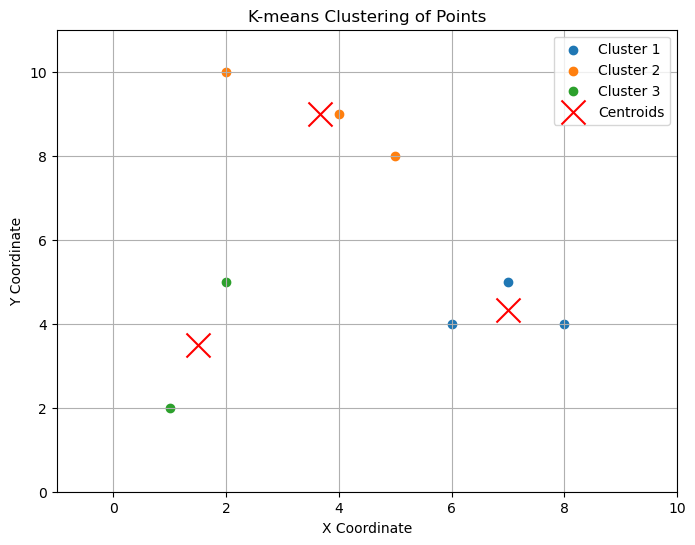

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize centroids randomly
def initialize_centroids(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

# Function to assign each data point to the nearest centroid
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids based on current cluster assignments
def update_centroids(data, clusters, k):
    return np.array([data[clusters == i].mean(axis=0) for i in range(k)])

# K-means clustering algorithm
def kmeans(data, k, max_iters=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

# Create sample data for the given points
data = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9]    # A8
])

# Number of clusters
k = 3

# Perform K-means clustering
centroids, clusters = kmeans(data, k)

# Visualize the results
plt.figure(figsize=(8, 6))

# Plot data points with cluster colors
for i in range(k):
    plt.scatter(data[clusters == i][:, 0], data[clusters == i][:, 1], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='x', label='Centroids')

# Add titles and labels
plt.title('K-means Clustering of Points')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.xlim(-1, 10)
plt.ylim(0, 11)
plt.legend()
plt.grid(True)

# Show plot
plt.show()
